# Open CV Brownbag Session

This Jupyter Notebook contains all the Python code needed to perform <b>Face Detection, Training and Classification and Face Recgonition </b>. In this tutorial, you will learn how to preprocess images in preparation for face detection, use pre-trained Haar Cascades to detect faces in an image, and finally train and classify images to recognize faces using the Local Binary Patterns Histogram (LBPH) algorithm.

The following libraries will be imported in this notebook:

<ul> 
    <li> cv2 - OpenCV (Open Source Computer Vision API) python package
    <li> numpy - Numerical Python </li>
    <li> matplotlib - Mathematical Plotting Library for Python </li>
    <li> PIL (Pillow) - Image formatting package </li> 
</ul>

### Importing Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time as t
import os
    
import matplotlib
%matplotlib inline

import PIL

from PIL import Image

library_version_list = (matplotlib.__version__ ,np.__version__, cv2.__version__, PIL.__version__)
print ("Library Versions:\n\n\
        Matplotlib\t%s\n\
        Numpy\t\t%s\n\
        OpenCV\t\t%s\n\
        PIL\t\t%s\n" % library_version_list)

Library Versions:

        Matplotlib	3.0.0
        Numpy		1.15.2
        OpenCV		3.4.3
        PIL		5.3.0



### Printing all files in the directory

In [2]:
DIR = {
    'input' : '../data/images/',
    'output' : '../data/images/output/',
    'cascades' : '../data/cascades/',
    'trainers' : '../data/trainer/',
}

### Loading the image

In [3]:
print(os.listdir(DIR['input']))

['seph2.jpg', 'seph3.jpg', '.DS_Store', 'output', 'seph.jpg', '.ipynb_checkpoints']


In [4]:
filename = DIR['input'] + 'seph.jpg'
image = cv2.imread(filename)
print ("Height:\t\t%i pixels\nWidth:\t\t%i pixels\nChannels:\t%i" % image.shape)

Height:		1365 pixels
Width:		2048 pixels
Channels:	3


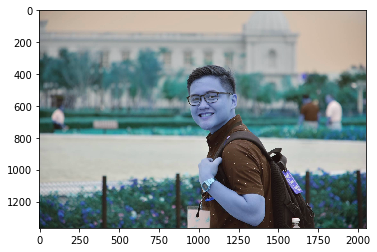

In [5]:
plt.imshow(image)
plt.show()

As you may have noticed, the colors of the image displayed above doesn't seem to match the original image. Actually, the image has been correctly loaded by openCV as a numpy array, but the color of each pixel has been sorted as BGR (Blue-Green-Red).
Matplotlib's plot expects an RGB image so, for a correct display of the image, it is necessary to swap those channels. 
This operation can be done either by using openCV conversion functions cv2.cvtColor() or by working directly with the numpy array.

#### cvtColor
cvtColor is the openCV function which changes the color space of an image. It takes as input an image and a numerical flag which represents the conversion function. Let's list some of that.

In [6]:
BGRflags = [flag for flag in dir(cv2) if flag.startswith('COLOR_BGR') ]
print(BGRflags)

['COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR2YUV', 'COLOR_BGR2YUV_I420', 'COLOR_BGR2YUV_IYUV', 'COLOR_BGR2YUV_YV12', 'COLOR_BGR5552BGR', 'COLOR_BGR5552BGRA', 'COLOR_BGR5552GRAY', 'COLOR_BGR5552RGB', 'COLOR_BGR5552RGBA', 'COLOR_BGR5652BGR', 'COLOR_BGR5652BGRA', 'COLOR_BGR5652GRAY', 'COLOR_BGR5652RGB', 'COLOR_BGR5652RGBA', 'COLOR_BGRA2BGR', 'COLOR_BGRA2BGR555', 'COLOR_BGRA2BGR565', 'COLOR_BGRA2GRAY', 'COLOR_BGRA2RGB', 'COLOR_BGRA2RGBA', 'COLOR_BGRA2YUV_I420', 'COLOR_BGRA2YUV_IYUV', 'COLOR_BGRA2YUV_YV12']


In this case it's necessary to change the image space from BGR (Blue, Green, Red) to RGB, so the correct flag is <b>cv2.COLOR_BGR2RGB</b>



In [7]:
time_start = t.time()
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
time_end = t.time()
elapsed_time = time_end - time_start
print ("Conversion took %0.5f seconds" % elapsed_time)

Conversion took 0.00916 seconds


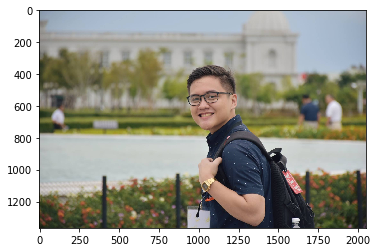

In [8]:
plt.imshow(rgb_image)
plt.show()

As expected, the image has now been converted to the RGB channel format. 

### Phase 1: Face Detection

Let's move on to Face Detection. Detecting a face requires a model that decides which features define a human face, and to perform this, we will be needing  a model called Haar Cascades. A Haar cascades is a classifier used to detect the object for which it was trained for, in this case, a face. The figure below shows how a haar cascade would identify features of the given object to be classified.

<img src="haar_features.jpg">

In [9]:
time_start = t.time()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
time_end = t.time()
elapsed_time = time_end - time_start
print ("Conversion took %0.5f seconds" % elapsed_time)

Conversion took 0.00331 seconds


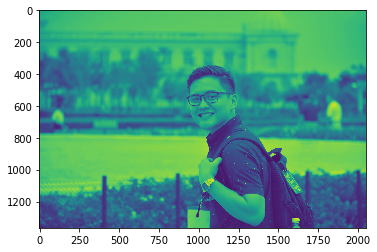

In [10]:
plt.imshow(gray_image) 
plt.show()

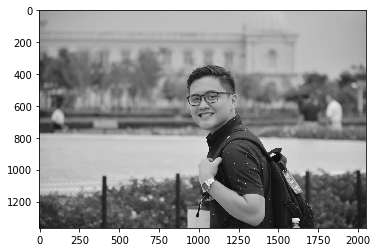

In [11]:
plt.imshow(gray_image, cmap = plt.cm.gray)
plt.show()

For this session, we will be loading a pre-trained haar cascade for frontal facial features into OpenCV.

In [12]:
filename = DIR['cascades'] + 'haarcascade_frontalface_default.xml'
cascade = cv2.CascadeClassifier(filename) #Haar Cascade used for Face Detection

Now that we have loaded the classifier into OpenCV, we will now start detecting faces on Seph's image using OpenCVs detectMultiScale function. The paramaeters of the function are the following:
<ul>
    <li>gray_image - Grayscaled version of the image to detect faces from. </li>
    <li>image_scale - Parameter specifying how much the image size is reduced at each image scale. </li>
    <li>n_neigbors - Parameter specifying how many neighbors each candidate rectangle should have to retain it. </li>
</ul>


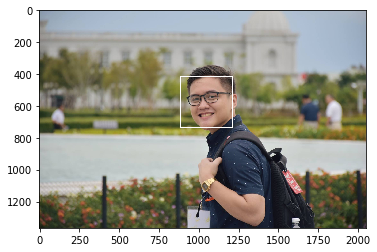

In [13]:
image_scale = 1.3
n_neighbors = 5


faces = cascade.detectMultiScale(gray_image, image_scale, n_neighbors)
user_id = 0
count_faces = 0
for x, y, w, h in faces:
    
    image = rgb_image
    tup_start_loc = (x,y)
    tup_abs_perimeter = (x+w, y+h)
    RGB_color = (255,255,255)
    border_width = 3
    
    cv2.rectangle(image, tup_start_loc, tup_abs_perimeter, RGB_color , border_width)
    plt.imshow(rgb_image) 
    
    
    cv2.imwrite(DIR['output'] + "User." + str(user_id) + "." + str(count_faces) + ".jpg", gray_image[y:y+h,x:x+w])

In [14]:
os.listdir(DIR['output'])


['.ipynb_checkpoints', 'User.0.0.jpg']

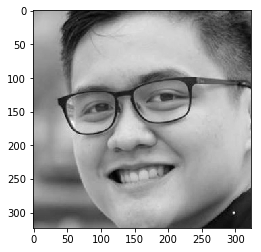

In [15]:
filename = DIR['output'] + 'User.0.0.jpg'
seph_img = cv2.imread(filename)
seph_img = cv2.cvtColor(seph_img, cv2.COLOR_BGR2GRAY)
plt.imshow(seph_img, cmap = plt.cm.gray)
plt.show()

### Phase 2: Face Training

Before we get into the training phase, we must first load the images from the input directory and detect the faces from each image.

In [16]:
def getImagesAndLabels(path, face_cascade):
    '''
        Retrieves the images including its labels in preparation for training
        Args:
            path (str): directory path of where the images are stored
            face_cascade (CascadeClassifier): Contains the trained Haar Cascades.
        Returns:
            faceSamples(list<numpy.Array>): Array representation of an image
            ids(list<int>): Array of ids corresponding to the user
    '''
    imagePaths = [os.path.join(path,f) for f in os.listdir(path) if '.jpg' in f]     
    faceSamples=[]
    ids = []

    for imagePath in imagePaths:

        PIL_img = Image.open(imagePath).convert('L') # convert it to grayscale
        img_numpy = np.array(PIL_img,'uint8')

        id = int(os.path.split(imagePath)[-1].split(".")[1])
        faces = face_cascade.detectMultiScale(img_numpy)

        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)

    return faceSamples,ids

In [17]:
faces, ids = getImagesAndLabels(DIR['output'], cascade)
print(ids)
print(faces)

[0]
[array([[167, 166, 166, ...,  52,  50,  49],
       [167, 166, 166, ...,  61,  59,  58],
       [166, 166, 165, ...,  67,  65,  65],
       ...,
       [ 74,  74,  74, ...,  41,  48,  65],
       [ 73,  73,  73, ...,  47,  36,  29],
       [ 73,  73,  73, ...,  36,  32,  37]], dtype=uint8)]


We will be using the Local Binary Patterns Historgram as our face trainer/classifier. Local Binary Pattern (LBP) is a simple yet very efficient texture operator which labels the pixels of an image by thresholding the neighborhood of each pixel and considers the result as a binary number.

<img src="lbph.png">

<img src="lbph2.png">

In [19]:
# recognizer = cv2.face.createLBPHFaceRecognizer()
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.train(faces, np.array(ids))

The training data is saved as a yml file in preparation for face recognition

In [41]:
# Save the model into trainer/trainer.yml
recognizer.save(DIR['trainers'] + 'trainer.yml') # recognizer.save() worked on Mac, but not on Pi

### Phase 3: Face Recognition

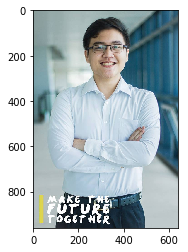

In [74]:
names=['Seph']
pic_id = 0
filename = DIR['input'] + 'seph2.jpg'
seph_img = cv2.imread(filename)
image_to_detect_gray = cv2.cvtColor(seph_img, cv2.COLOR_BGR2GRAY)
image_to_detect = cv2.cvtColor(seph_img, cv2.COLOR_BGR2RGB)
plt.imshow(image_to_detect, cmap=plt.cm.gray)
plt.show()

In [75]:
faces = cascade.detectMultiScale( 
        image_to_detect,
        scaleFactor = 1.3,
        minNeighbors = 5,
       )

font = cv2.FONT_HERSHEY_SIMPLEX


It's now time to use LBPH's predict method on the new image and see which faces it could recongize

<Figure size 432x288 with 0 Axes>

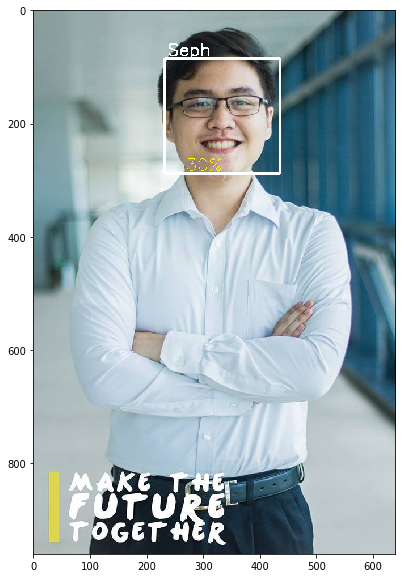

In [77]:
plt.clf()
plt.figure(figsize=(20,10))
for(x,y,w,h) in faces:
    
    cv2.rectangle(image_to_detect, (x,y), (x+w,y+h), (255,255,255), 3)
    pic_id, confidence = recognizer.predict(image_to_detect_gray[y:y+h,x:x+w])
    
    threshold = 100
    if (confidence <= threshold):
        pic_id = names[pic_id]
        confidence_str = "  {0}%".format(round((threshold - confidence)/ threshold * 100))
    elif(confidence > threshold):
        pic_id = "Unknown User"
        confidence_str = "  {0}%".format(round((threshold - confidence)/ threshold * 100))
        
    cv2.putText(image_to_detect, str(pic_id), (x+5,y-5), font, 1, (255,255,255), 2)
    cv2.putText(image_to_detect, str(confidence_str), (x+5,y+h-5), font, 1, (255,255,0), 1)  
    
plt.clf()

plt.imshow(image_to_detect)